In [3]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score


merged_data = pd.read_csv(r"C:\Users\mcarl\OneDrive\Ambiente de Trabalho\Modelação e Simulaçao\MS_G18_2425\merged_data.csv")

X = merged_data[
    [
        "Wealth",
        # "Opportunities",
        "Career Years",
        "Sex",
        "Job",
        "Dieseases",
        "Has Car",
        "Has House",
        # "Job Loss Probability",
        # "Reproduction Chance",
        "Child Possibility",
        "actual_children",
        "Personal Luxuries",
        "Healthcare Cost",
    ]
]
y = merged_data["Group"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

y.value_counts()

Group
1    38154
0    22073
Name: count, dtype: int64

In [4]:
model = joblib.load(r"C:\Users\mcarl\OneDrive\Ambiente de Trabalho\Modelação e Simulaçao\MS_G18_2425\models\LightGBM.pkl")
y_pred = model.predict(X_test)

job = X_test["Job"]

mf = MetricFrame(
    metrics=accuracy_score, y_true=y_test, y_pred=y_pred, sensitive_features=job
)

print("Overall Metric Frame: ", mf.overall)
print("\nMetric Frame by group: ", mf.by_group)

Overall Metric Frame:  0.7148707731473795

Metric Frame by group:  Job
False    0.783080
True     0.709217
Name: accuracy_score, dtype: float64


The	Overall Metric Frame (0.7148) represents the specified overall performance metric (accuracy) across all groups combined. The value of 0.7148 suggests that the model’s accuracy is about 71.5% when evaluated on the entire dataset, without differentiating by groups.

The Metric Frame by Group (regarding Job) evaluates the model’s accuracy score for specific groups within the feature Job, divided into two categories, False and True:

- False (0.7830): For the group labeled False under Job, the model has an accuracy score of 78.3%. 
- True (0.7092): For the group labeled True under Job, the accuracy is 70.9%, which is closer to the overall accuracy score and significantly better than the False group.

array([[<Axes: title={'center': 'accuracy'}, xlabel='Job'>,
        <Axes: title={'center': 'precision'}, xlabel='Job'>,
        <Axes: title={'center': 'false positive rate'}, xlabel='Job'>],
       [<Axes: title={'center': 'false negative rate'}, xlabel='Job'>,
        <Axes: title={'center': 'selection rate'}, xlabel='Job'>,
        <Axes: title={'center': 'count'}, xlabel='Job'>],
       [<Axes: xlabel='Job'>, <Axes: xlabel='Job'>, <Axes: xlabel='Job'>]],
      dtype=object)

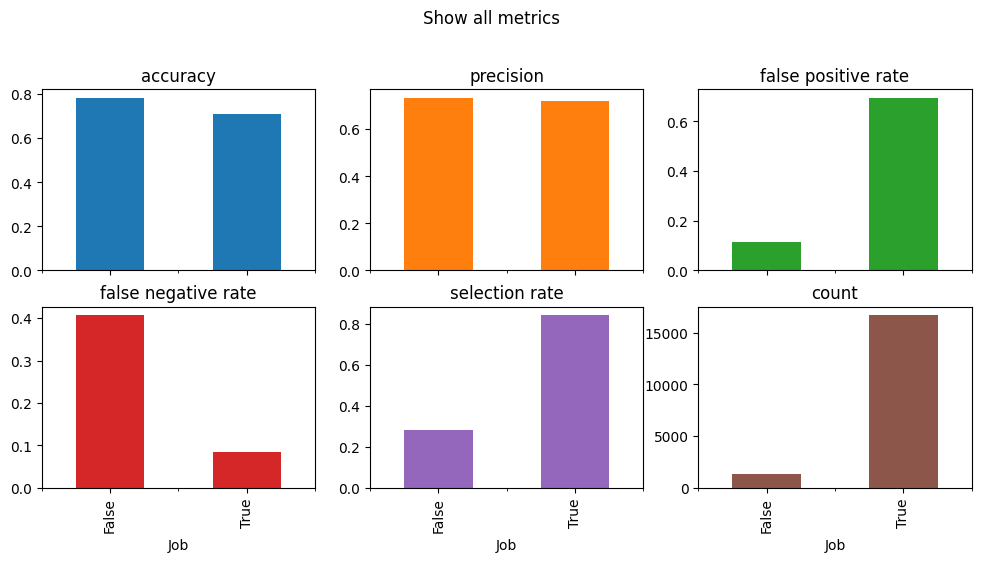

In [5]:
from fairlearn.metrics import (MetricFrame,  false_positive_rate,
    false_negative_rate, selection_rate, count)
from sklearn.metrics import (
    accuracy_score,
    precision_score
)

metrics = {
    "accuracy": accuracy_score,
    "precision": precision_score,
    "false positive rate": false_positive_rate,
    "false negative rate": false_negative_rate,
    "selection rate": selection_rate,
    "count": count,
}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=job
)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics",
)

In [6]:
from fairlearn.reductions import DemographicParity, ExponentiatedGradient

np.random.seed(42)

constraint = DemographicParity()
job = X_train["Job"]
mitigator = ExponentiatedGradient(model, constraint)
mitigator.fit(X_train, y_train, sensitive_features=job)

y_pred_mitigated = mitigator.predict(X_test)

job = X_test["Job"]
sr_mitigated = MetricFrame(metrics=selection_rate, y_true=y_test, y_pred=y_pred_mitigated, sensitive_features=job)

sr_mitigated.overall

0.7200177098898666

In [7]:
sr_mitigated.by_group

Job
False    0.710774
True     0.720784
Name: selection_rate, dtype: float64